In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Multinomial Naive Bayes on Headlines Only

In [4]:
df = pd.read_csv('../../../features.csv', sep='|', index_col=0)
df['Company'].value_counts()

Facebook          1977
Twitter            902
Alibaba            544
Groupon            426
General Motors     368
LinkedIn           193
Snapchat           185
Blue Apron         125
Fitbit             114
Etsy               104
Shake Shack        103
GoPro               91
Workday             90
Ferrari             46
Stitch Fix          33
Name: Company, dtype: int64

In [5]:
df.head()

,Headline,Source,Date,Word Count,Company,Industry,IPO Period,Day of Week,Source Tier,PositiveScore,...,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6,Offer Date +90,Date_y,Close +90,% Px Chng +90,Label
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook,Technology,1,4,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook,Technology,1,5,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,Facebook,Technology,2,3,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,Facebook,Technology,2,4,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,Facebook,Technology,1,6,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative


## Tried Removing Facebook Since it Represented a Disproportionate Number of Instances

In [380]:
#df_woFB = df[df['Company'] != 'Facebook']
#df_woFB['Company'].value_counts()

In [6]:
## Replacing all the numbers in the text to 'NUM_' to simplify and reduce total featues
text_data = df['Headline'].replace('\d+', 'NUM_', regex=True)
#text_data = df_woFB['Headline'].replace('\d+', 'NUM_', regex=True)
text_data.head()

0    FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...
1    FACEBOOK PRICES ITS STOCK AT $NUM_ A SHARE FOR...
2    REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...
3    FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...
4                                  FAQ: Facebook's IPO
Name: Headline, dtype: object

In [7]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english')

In [8]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
vectorizer.get_feature_names()
#vectorizer.vocabulary_

['abandons',
 'abercrombie',
 'ability',
 'able',
 'abound',
 'abounding',
 'accel',
 'accelerate',
 'acceleration',
 'access',
 'accessibility',
 'accommodations',
 'according',
 'account',
 'accounting',
 'accounts',
 'accusations',
 'accused',
 'achievements',
 'achilles',
 'ackaman',
 'acquired',
 'acquisition',
 'acquisitions',
 'acsoi',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'ad',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressed',
 'addressing',
 'adds',
 'admits',
 'adp',
 'adrs',
 'ads',
 'advance',
 'adventure',
 'advertis',
 'advertisers',
 'advertisi',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisers',
 'advisory',
 'advocates',
 'affair',
 'affect',
 'affected',
 'affects',
 'affordable',
 'aflutter',
 'afraid',
 'aftermath',
 'aftershocks',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggregate',
 'aggressive',
 'ago',
 'agreements',
 'agrees',
 'ah',
 'ahead',
 'ailing',
 'aim',
 'aiming',
 'aims',
 'ain',
 'air',
 'a

In [424]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False).head()

,0
œwebsitesâ,7844
œwe,7843
œunique,7842
œunfriendingâ,7841
œtwtrâ,7840


#### Transform to Document Term Matrix

In [386]:
dtm = vectorizer.transform(text_data)
dtm

<5301x4711 sparse matrix of type '<class 'numpy.int64'>'
	with 40946 stored elements in Compressed Sparse Row format>

In [387]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Columns: 4711 entries, abandons to œtwitter
dtypes: int64(4711)
memory usage: 190.5 MB


In [388]:
#Text_Features.to_csv('TEXT_FEATURES.csv')

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

X = Text_Features
y = np.array(df['Label'].tolist())
#y = np.array(df_woFB['Label'].tolist())
len(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
#print(X_train.shape, y_train.shape)

/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'Text_Features' is not defined

In [390]:
nb = MultinomialNB()

In [391]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [392]:
y_pred_class = nb.predict(X_test)

In [393]:
#metrics.accuracy_score(y_test, y_pred_class)
metrics.accuracy_score(y_test, y_pred_class)

0.9924585218702866

In [394]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.99      0.99      0.99       770
   Positive       0.99      0.99      0.99       556

avg / total       0.99      0.99      0.99      1326



## Yellowbrick Classification Report

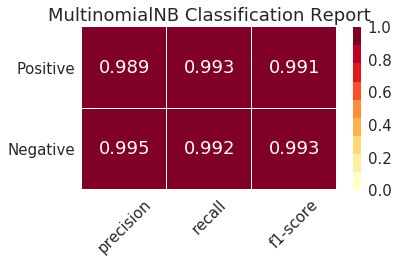

In [396]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Confusion Matrix

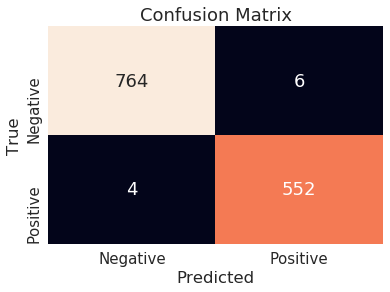

In [397]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

# Same Analysis on Story Text

In [422]:
stories = pd.read_csv('Text.csv', index_col=0)
stories.head()

,Text,Label,Label180
0,Facebook wooed Madison Avenue on Wednesday wit...,Negative,Negative
1,Facebook Inc. priced its shares in its initial...,Negative,Negative
2,NEW YORK -- Securities regulators are amping u...,Negative,Negative
3,WASHINGTON -- A class-action lawsuit was filed...,Negative,Negative
4,The most anticipated IPO since Google is one s...,Negative,Negative


In [399]:
text_data = stories['Text'].replace('\d+', 'NUM_', regex=True)

In [400]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english')

In [401]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [423]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False).head()

,0
œwebsitesâ,7844
œwe,7843
œunique,7842
œunfriendingâ,7841
œtwtrâ,7840


In [403]:
dtm = vectorizer.transform(text_data)
dtm

<4389x7845 sparse matrix of type '<class 'numpy.int64'>'
	with 83630 stored elements in Compressed Sparse Row format>

In [404]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Columns: 7845 entries, _follow_along to œwebsitesâ
dtypes: int64(7845)
memory usage: 262.7 MB


## Target is +90 Price Change Using Full Story Text

In [413]:
X = Text_Features
y = np.array(stories['Label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3291, 7845) (3291,)


In [414]:
nb = MultinomialNB()

In [415]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [416]:
y_pred_class = nb.predict(X_test)

In [417]:
metrics.accuracy_score(y_test, y_pred_class)

0.95992714025500914

In [418]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.96      0.96      0.96       623
   Positive       0.95      0.95      0.95       475

avg / total       0.96      0.96      0.96      1098



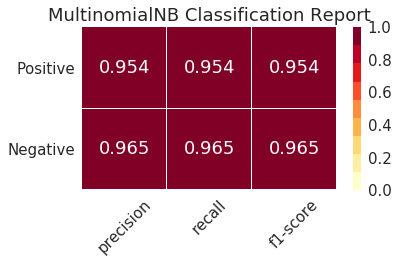

In [420]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

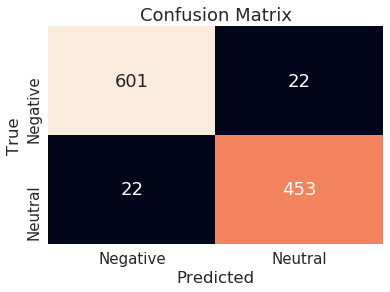

In [421]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

## Target is +180 Price Change Using Full Story Text

In [405]:
X = Text_Features
y = np.array(stories['Label180'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3291, 7845) (3291,)


In [406]:
nb = MultinomialNB()

In [407]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [408]:
y_pred_class = nb.predict(X_test)

In [409]:
metrics.accuracy_score(y_test, y_pred_class)

0.95081967213114749

In [410]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.97      0.97      0.97      1017
    Neutral       0.45      0.41      0.43        22
   Positive       0.74      0.76      0.75        59

avg / total       0.95      0.95      0.95      1098



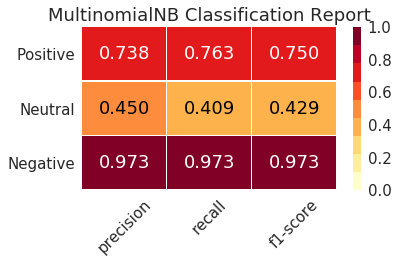

In [411]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Neutral', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

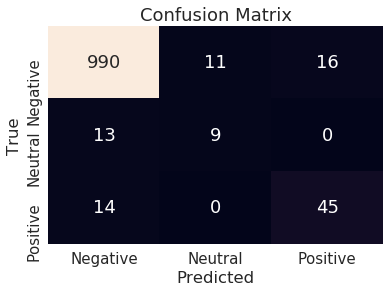

In [412]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()